Notes and programs from the following talk  

Title: Fourier Series and Transform from nature's perspective  
Speakers: Nevil Shah/Vishal Gaur  
Date: 09/10/2019  

A few online referances to get the "feel" of the concept  
[Fourier Series Animation (Square Wave)](https://www.youtube.com/watch?time_continue=5&v=k8FXF1KjzY0)  
https://betterexplained.com/examples/fourier/?cycles=0,1  
https://betterexplained.com/examples/fourier/?cycles=0,1,1

In [8]:
#Load libraries
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.fftpack

### Fourier transform and inverse fourier

/home/dl/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


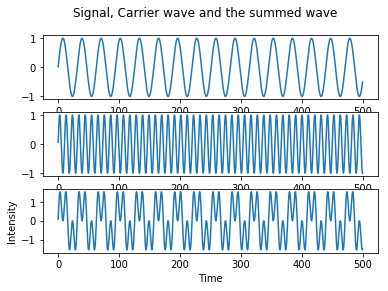

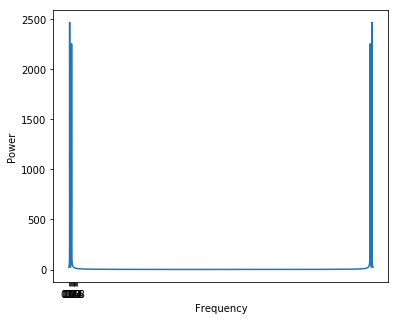

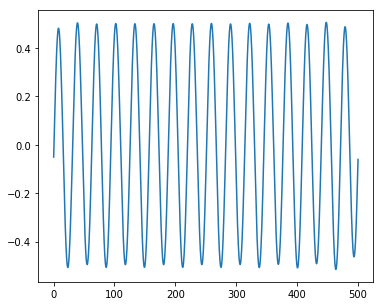

In [11]:
#Define variables
L1 = np.arange(0.1,500.1,0.1)
L2 = []
L3 = []
L23 = []
W = 0.2
W1 = 0.6
noise = np.random.uniform(0.1,1,len(L1))
for i in range(len(L1)):
	L2.append(m.sin(W*L1[i]))
	L3.append(m.sin(W1*L1[i]))
	L23.append(m.sin(W1*L1[i])+m.sin(W*L1[i]))
Y = []
X = []
fft_L23 = scipy.fftpack.fft(L23)
for i in range(0,len(fft_L23)):
	psd = abs(fft_L23[i])
	Y.append(psd)
for i in range(0,len(fft_L23)):
	X.append(10*2*3.14*i/len(fft_L23))
fig, axs = plt.subplots(3)
fig.suptitle('Signal, Carrier wave and the summed wave')
axs[0].plot(L1,L2)
axs[1].plot(L1,L3)
axs[2].plot(L1,L23)
plt.xlabel('Time')
plt.ylabel('Intensity')

plt.figure(figsize=(6, 5))
plt.plot(X,Y)
plt.xticks(np.arange(0, 2, step=0.2))
plt.xlabel('Frequency')
plt.ylabel('Power')

for i in range(len(fft_L23)):
    if X[i] > 0.3:
        fft_L23[i] = 0
    if X[i] < 0.1:
        fft_L23[i] = 0
S = scipy.fftpack.ifft(fft_L23)
plt.figure(figsize=(6, 5))
plt.plot(L1,S)
plt.show()

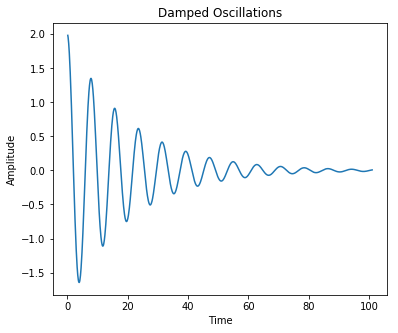

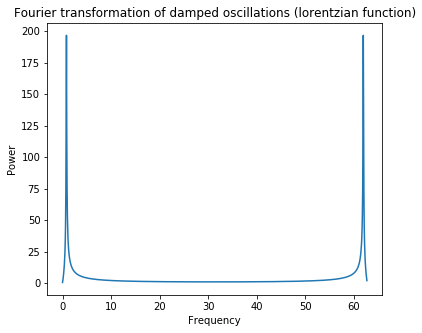

In [12]:
x = np.arange(0.1,101.1,0.1)
gamma = 0.05
a = 2
W = 0.8
alpha = 0.005
y = np.exp(-gamma*x) * a * np.cos(W*x - alpha) 
plt.figure(figsize=(6, 5))
plt.plot(x,y)
plt.title("Damped Oscillations")
plt.xlabel("Time")
plt.ylabel("Amplitude")
Y = []
X = []
A = scipy.fftpack.fft(y)
for i in range(0,len(A)):
    psd = abs(A[i])
    Y.append(psd)
for i in range(0,len(A)):
    X.append(2*3.14*i/(len(A)*0.1))
plt.figure(figsize=(6, 5))
plt.plot(X,Y)
plt.title("Fourier transformation of damped oscillations (lorentzian function)")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.show()

/home/dl/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


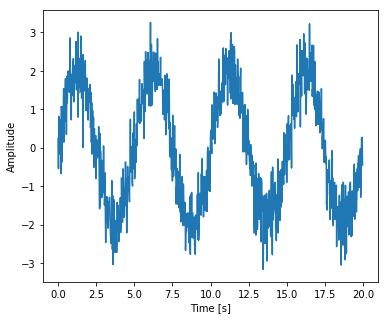

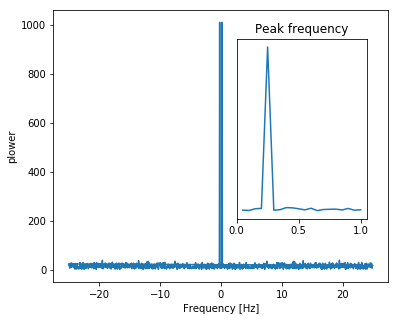

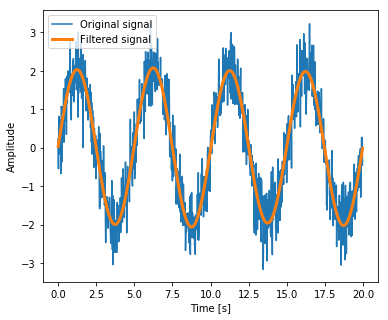

In [13]:
np.random.seed(1234)

time_step = 0.02
period = 5.
period1 = 5

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)) + (np.sin(2 * np.pi / period1 * time_vec)) + 0.5 * np.random.randn(time_vec.size)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

sig_fft = fftpack.fft(sig)

power = np.abs(sig_fft)

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

np.allclose(peak_freq, 1./period)

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:20], power[:20])
plt.setp(axes, yticks=[])


high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')
plt.show()